<a href="https://colab.research.google.com/github/shivamdhumal77/Regression/blob/main/lasso_ridge_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Numerical libraries
import numpy as np

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [ ]:

import pandas as pd
import io

mpg_df = pd.read_csv(io.BytesIO(uploaded['auto-mpg.csv']))
print(mpg_df)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

In [ ]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
mpg_df[mpg_df['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
mpg_df=mpg_df.replace('?',np.nan)

In [ ]:
mpg_df=mpg_df.drop('car name',axis=1)

In [ ]:
mpg_df=mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [ ]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [ ]:
X = mpg_df.drop('mpg', axis=1)

In [ ]:
y = mpg_df[['mpg']]

<ipython-input-18-0679a07b5d93>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i])
<ipython-input-18-0679a07b5d93>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i])
<ipython-input-18-0679a07b5d93>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14

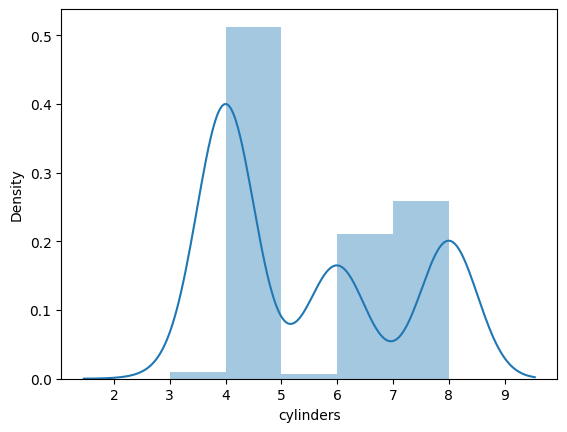

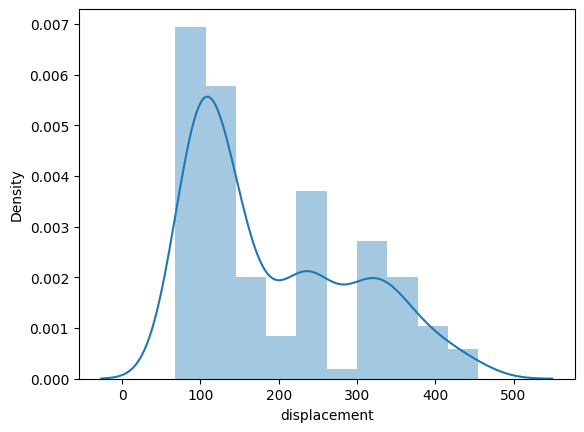

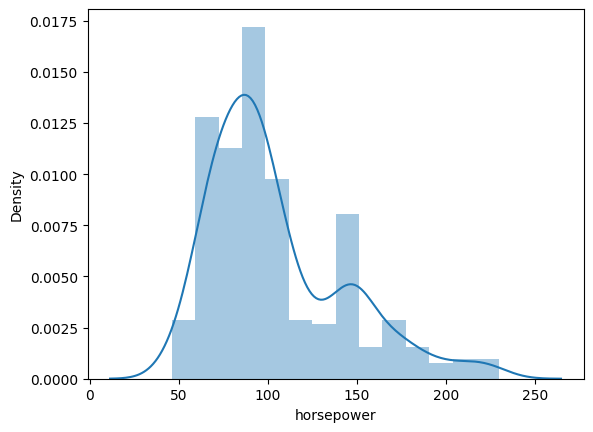

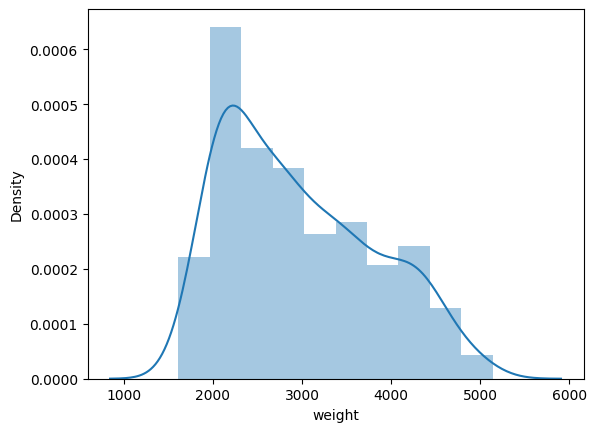

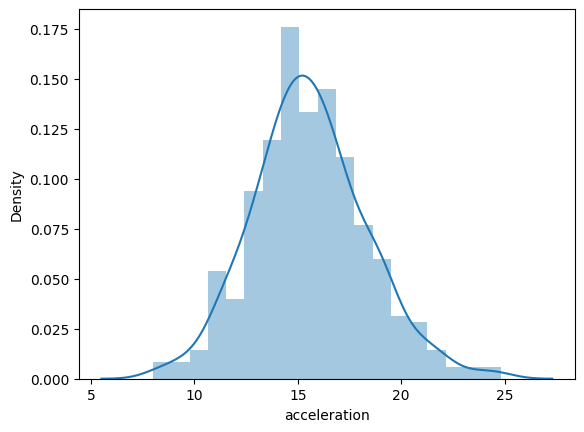

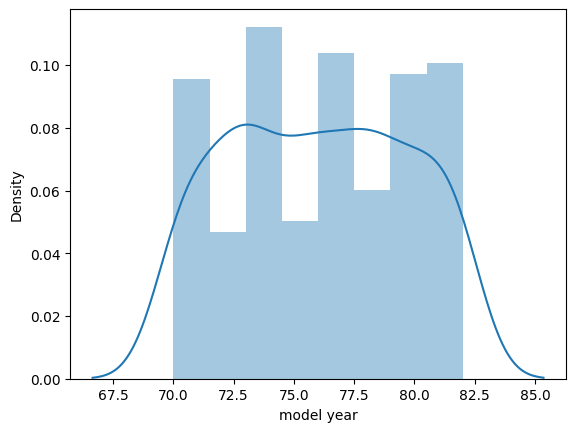

In [ ]:
a=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
for i in a:
    plt.figure()
    sns.distplot(X[i])

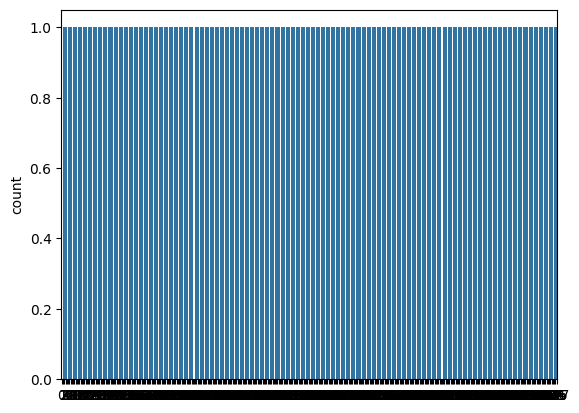

In [ ]:
a=['origin']
for i in a:
    plt.figure()
    sns.countplot(X[i])

<ipython-input-20-78b2b399f911>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y['mpg'])


<Axes: xlabel='mpg', ylabel='Density'>

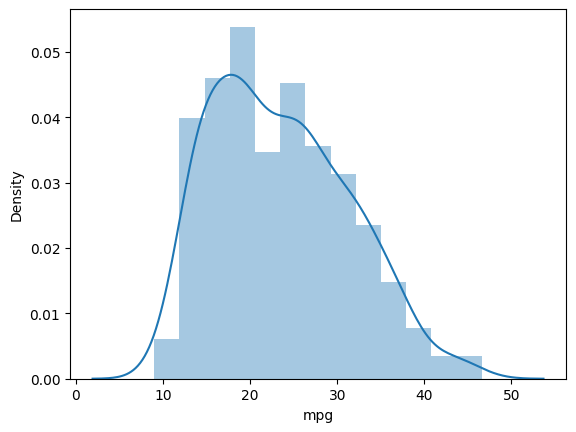

In [ ]:
sns.distplot(y['mpg'])

In [ ]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [ ]:
# simple linear model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))


The coefficient for cylinders is -0.08561436895562706
The coefficient for displacement is 0.3044182253593021
The coefficient for horsepower is -0.09718466302484209
The coefficient for weight is -0.7628632829136761
The coefficient for acceleration is 0.021591275172924747
The coefficient for model year is 0.3749408074118709
The coefficient for origin is 0.12302637024556841


In [ ]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.012833128293992874


In [ ]:
# Regularised ridge model
ridge = Ridge(alpha=.3) #coefficients are prevented to become too big by this alpha value
ridge.fit(X_train,y_train)
for i,col in enumerate(X_train.columns):
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))

Ridge model coefficients for cylinders is -0.08073001909555927:
Ridge model coefficients for displacement is 0.28822207417231654:
Ridge model coefficients for horsepower is -0.09985675156606108:
Ridge model coefficients for weight is -0.7510550916024499:
Ridge model coefficients for acceleration is 0.019127698314832926:
Ridge model coefficients for model year is 0.37378312489584287:
Ridge model coefficients for origin is 0.1221271728580029:


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

Lasso model coefficients for cylinders is -0.0:
Lasso model coefficients for displacement is -0.0:
Lasso model coefficients for horsepower is -0.013280002937314536:
Lasso model coefficients for weight is -0.6205207866794482:
Lasso model coefficients for acceleration is 0.0:
Lasso model coefficients for model year is 0.29198732924913484:
Lasso model coefficients for origin is 0.021567653979880638:


In [ ]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.8081802739111359
0.8472274567567306


In [ ]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8081651504849107
0.8475401122140553


In [ ]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7853770917055521
0.8277658025171161


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [ ]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(278, 29)

In [ ]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[-2.76250572e+13  7.99792428e-01 -2.43366523e+00 -1.18705432e+00
 -4.57525903e+00 -1.66747515e-01  2.95433461e+00  2.51692272e-01
  7.42696424e-01  2.62478709e-01  1.37185147e+00  3.36472579e-01
 -6.23809665e-01 -2.41178063e-01  4.13259091e-01  4.57012296e-01
  1.28699742e-01  2.59418185e+00  2.68080857e+00 -5.15451919e-01
 -9.85960041e-01 -1.64356947e+00  2.26849587e+00  5.01755502e-01
 -3.85414428e-01 -2.69114801e+00  4.53185322e-01  1.73665448e+00
  1.27351855e+00]


In [ ]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.          0.64813084 -0.36554878 -2.46919357 -4.70667241 -0.63510083
   2.8499319   0.96173248 -0.49248204 -0.57492325  1.37951065  1.0927984
  -1.42036657  0.89110432 -0.16927823  1.35119104 -1.1349459   3.21038276
   1.16514278  0.22836119 -0.89663938 -1.35284633  0.79573939  0.58576253
  -0.61776911 -0.88637153  0.54014514  1.23036832  0.88256903]]


In [ ]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8924614223751737
0.861502546945558


In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.2994648  -0.08787231 -2.43642026 -4.7023043  -0.41557099
  2.82883219  0.79630585 -0.63845609 -0.19106524  1.35870323  0.71048483
 -0.95232354  0.80157019 -0.          1.30713909 -0.22245995  2.23244448
  0.41856317  0.         -0.68238432 -1.20299711  0.33414503  0.06086321
 -0.38005578 -0.07856802  0.52335532  1.11608276  0.72523195]


In [ ]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8910435407965047
0.8679233223131172
